# Streaming Histogram
The streaming histogram is a data structure that takes in a single data point and updates the internal histogram
structure. This histogram is a variant of the Ben-Haim, Tom-Tov histogram.

In [1]:
from KML.data_structures.histograms.StreamingHistogram import PyStreamingHistogram as pyhist
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

## Define Histogram Parameters

In [2]:
num_bins = 100
window_size = 100

## Define data

In [3]:
np.random.seed(42)
data = np.random.randn(1000).flatten()

## Show distribution in batch setting

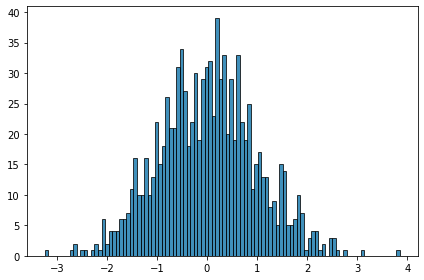

In [4]:
fig, ax = plt.subplots(1, tight_layout=True)
_ = ax.hist(
    data, bins=num_bins, 
    align="mid",
    ec="black",
    alpha=0.75,
    linewidth=1
)

## Show distribution with batch in streaming histogram

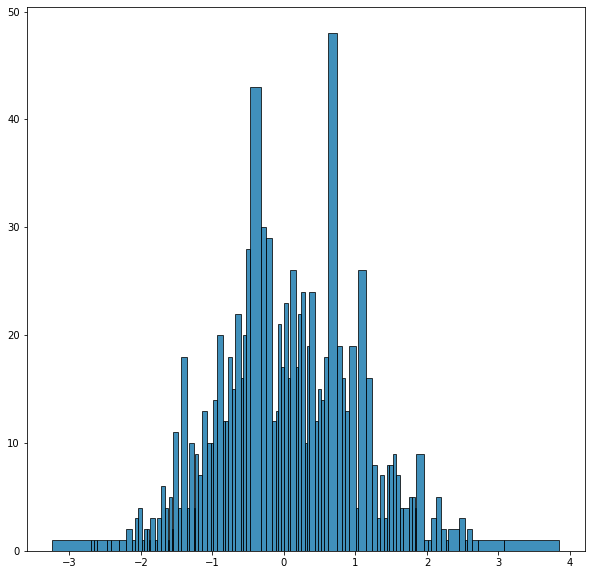

In [5]:
hist = pyhist(num_bins, 1000)

# Batch update
hist.update(data)

report = hist.report()
edges = np.array(list(report.keys()))
counts = np.array(list(report.values()))

fig, ax = plt.subplots(figsize=(10, 10))
bin_edges = np.array([e[0] for e in edges])
_ = ax.bar(
    x=bin_edges[:-1],
    height=counts[:-1],
    width=np.diff(bin_edges),
    align="edge",
    ec="black",
    alpha=0.75,
    linewidth=1
)

# Additional Functions

## Display quantile calculation

### Numpy Quantile

In [6]:
np.quantile(data, 0.9)

1.305645201867139

### Streaming Histogram Quantile
The more bins, the better the quantile calculation.

In [7]:
hist = pyhist(num_bins, 1000)
hist.update(data)

hist.quantile(0.9)

1.2530546434611507

## Showcase Approximating Density
The density calculation from the histogram isn't bad. However, it does appear that the lower number of bins used the better
the approximation.

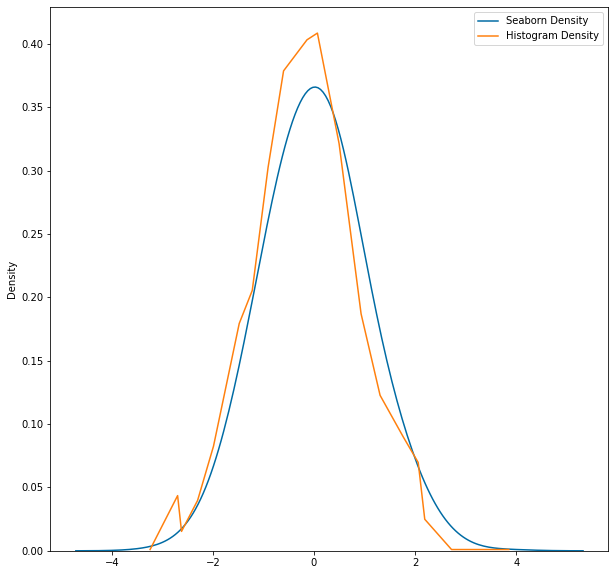

In [82]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(np.array(data), bw_method=0.5)

hist = pyhist(20, 1000)

# Batch update
hist.update(data)

report = hist.report()
edges = np.array(list(report.keys()))
counts = np.array(list(report.values()))
bin_edges = np.array([e[0] for e in edges])

plt.plot(bin_edges, hist.pdf(True, True))
plt.legend(["Seaborn Density", "Histogram Density"])